# Setting up

## Server dependencies

TeX packages

In [1]:
!sudo apt-get -qq update
!sudo apt-get -qq install texlive-fonts-recommended texlive-fonts-extra dvipng

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 86.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-droid-fallback.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../00-fonts-droid-fallback_1%3a6.0.1r16-1.1_all.deb ...
Unpacking fonts-droid-fallback (1:6.0.1r16-1.1) ...
Selecting previously unselected package fonts-lato.
Preparing to unpack .../01-fonts-lato_2.0-2_all.deb ...
Unpacking fonts-lato (2.0-2) ...
Selecting previously unselected package poppler-data.
Preparing to unpack .../02-poppler-data_0.4.8-2_all.deb ...
Unpacking poppler-data (0.4.8-2

Pip modules

In [2]:
!pip install -q tensorflow-gpu==2.0.0-rc0 pyDOE

     |████████████████████████████████| 380.5MB 81kB/s 
     |████████████████████████████████| 4.3MB 56.1MB/s 
     |████████████████████████████████| 501kB 62.2MB/s 


## Moving to the project folder

In [33]:
from google.colab import drive
import os
import sys
import json
import glob

driveDir = "/content/gdrive"
repoDir = "My Drive/Work/ETS/Thesis/Projects/PINNs-TF2.0"
projectDir = os.path.join(driveDir, repoDir)

drive.mount(driveDir, force_remount=True)
os.chdir(projectDir)
!pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/Work/ETS/Thesis/Projects/PINNs-TF2.0


# Running

Training

In [78]:
!stat '1dcomplex-schrodinger/inf_cont_schrodinger.py'

  File: 1dcomplex-schrodinger/inf_cont_schrodinger.py
  Size: 6059      	Blocks: 12         IO Block: 65536  regular file
Device: 4eh/78d	Inode: 34          Links: 1
Access: (0600/-rw-------)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 1970-01-01 00:00:00.000000000 +0000
Modify: 2019-09-06 15:36:20.000000000 +0000
Change: 2019-09-06 15:36:20.000000000 +0000
 Birth: -


In [79]:
!python '1dcomplex-schrodinger/inf_cont_schrodinger.py'

Hyperparameters:
{
  "N_0": 50,
  "N_b": 50,
  "N_f": 20000,
  "layers": [
    2,
    100,
    100,
    100,
    100,
    2
  ],
  "tf_epochs": 500,
  "tf_lr": 0.04,
  "tf_b1": 0.99,
  "tf_eps": 0.1,
  "nt_epochs": 500,
  "nt_lr": 0.8,
  "nt_ncorr": 50
}

TensorFlow version: 2.0.0-rc0
Eager execution: True
GPU-accerelated: True

Training started
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 100)               300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
______________________________________

Plotting

{
  "N_0": 50,
  "N_b": 50,
  "N_f": 20000,
  "layers": [
    2,
    100,
    100,
    100,
    100,
    2
  ],
  "tf_epochs": 500,
  "tf_lr": 0.04,
  "tf_b1": 0.99,
  "tf_eps": 0.1,
  "nt_epochs": 500,
  "nt_lr": 0.8,
  "nt_ncorr": 50
}


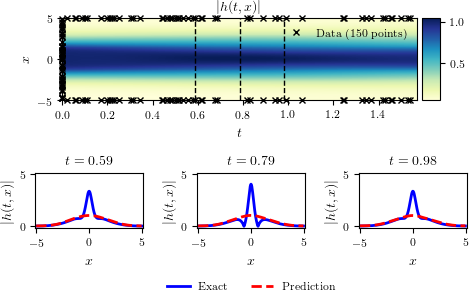

In [80]:
directory = "./1dcomplex-schrodinger/results/"
lastResDir = max(glob.glob(os.path.join(directory, '*/')), key=os.path.getmtime)

with open(os.path.join(lastResDir, "hp.json")) as f:
  hp = json.load(f)
print(json.dumps(hp, indent=2))

from IPython.display import Image
Image(os.path.join(lastResDir, "graph.png"))